# Analyse Correlations in the Dataset
## **A Notebook for Finding Correlations Across Demographic Categories and Income/Wage**

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mplt
import plotly.express as plt

In [21]:
correlational_df = pd.read_csv('preprocessed_data/correlational_analysis_data.csv')
correlational_df.drop(columns='Unnamed: 0', inplace=True)

In [69]:
regression_df = pd.read_csv('preprocessed_data/regression_data.csv')
regression_df.drop(columns='Unnamed: 0', inplace=True)

In [40]:
correlation_matrix = regression_df.corr()
#Correlation with output variable
cor_target = abs(correlation_matrix["PINCP"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

AGEP                           0.259407
JWMNP                          0.288945
WAGP                           0.860196
WKHP                           0.442525
PINCP                          1.000000
COW[N/A]                       0.327048
MAR[Married]                   0.284411
MAR[Never Married/Under 15]    0.303162
SCHL[No HS Diploma]            0.280376
WKW[50 to 52 Weeks]            0.402492
WKW[No Work/Under 16 Years]    0.360737
INDP[N/A]                      0.327048
OC[Has Children]               0.269165
OC[No Children]                0.279869
Name: PINCP, dtype: float64

(20.0, 0.0)

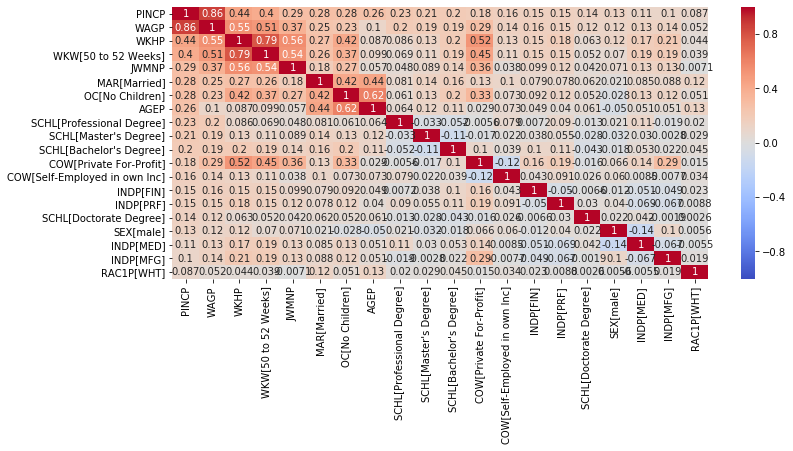

In [43]:
k = 20
  
cols = correlation_matrix.nlargest(k, 'PINCP')['PINCP'].index 
  
cm = np.corrcoef(regression_df[cols].values.T) 
f, ax = mplt.subplots(figsize =(12, 5)) 
  
ax = sns.heatmap(cm,
                 xticklabels= cols.values , yticklabels= cols.values, 
                 cmap='coolwarm',annot=True,linewidth=0, vmin=-1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [68]:
def describe_data(data, IV, DV):
    descriptives = data.groupby(IV).agg(["count",'mean','std','sem'])
    return descriptives[DV]
descriptives_sex = describe_data(correlational_df, "SEX", "PINCP")
descriptives_race = describe_data(correlational_df, "RAC1P", "PINCP")
descriptives_intersection = describe_data(correlational_df, ["SCHL",'SEX'], "PINCP")
descriptives_intersection

KeyError: 'SEX'

In [57]:
def visualize_descriptives():
    #everytime you use this, change your x and your data...
    descriptives_race.reset_index(inplace=True)
    graph = plt.bar(descriptives_race, x = 'RAC1P', y = "mean", error_x = "sem", error_y = "sem", template='none', width=500, 
                labels = {"mean": "Income", 'RAC1P': "Gender"}) 
    
    graph.update_traces(marker_color="#d3d3d3")
    graph.update_traces(marker= dict(line={"width":3,"color":"#000000"}))

    graph.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
    graph.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})


    graph.show()
    
    import plotly.express as px
    
visualize_descriptives()

Exception: Data must be 1-dimensional

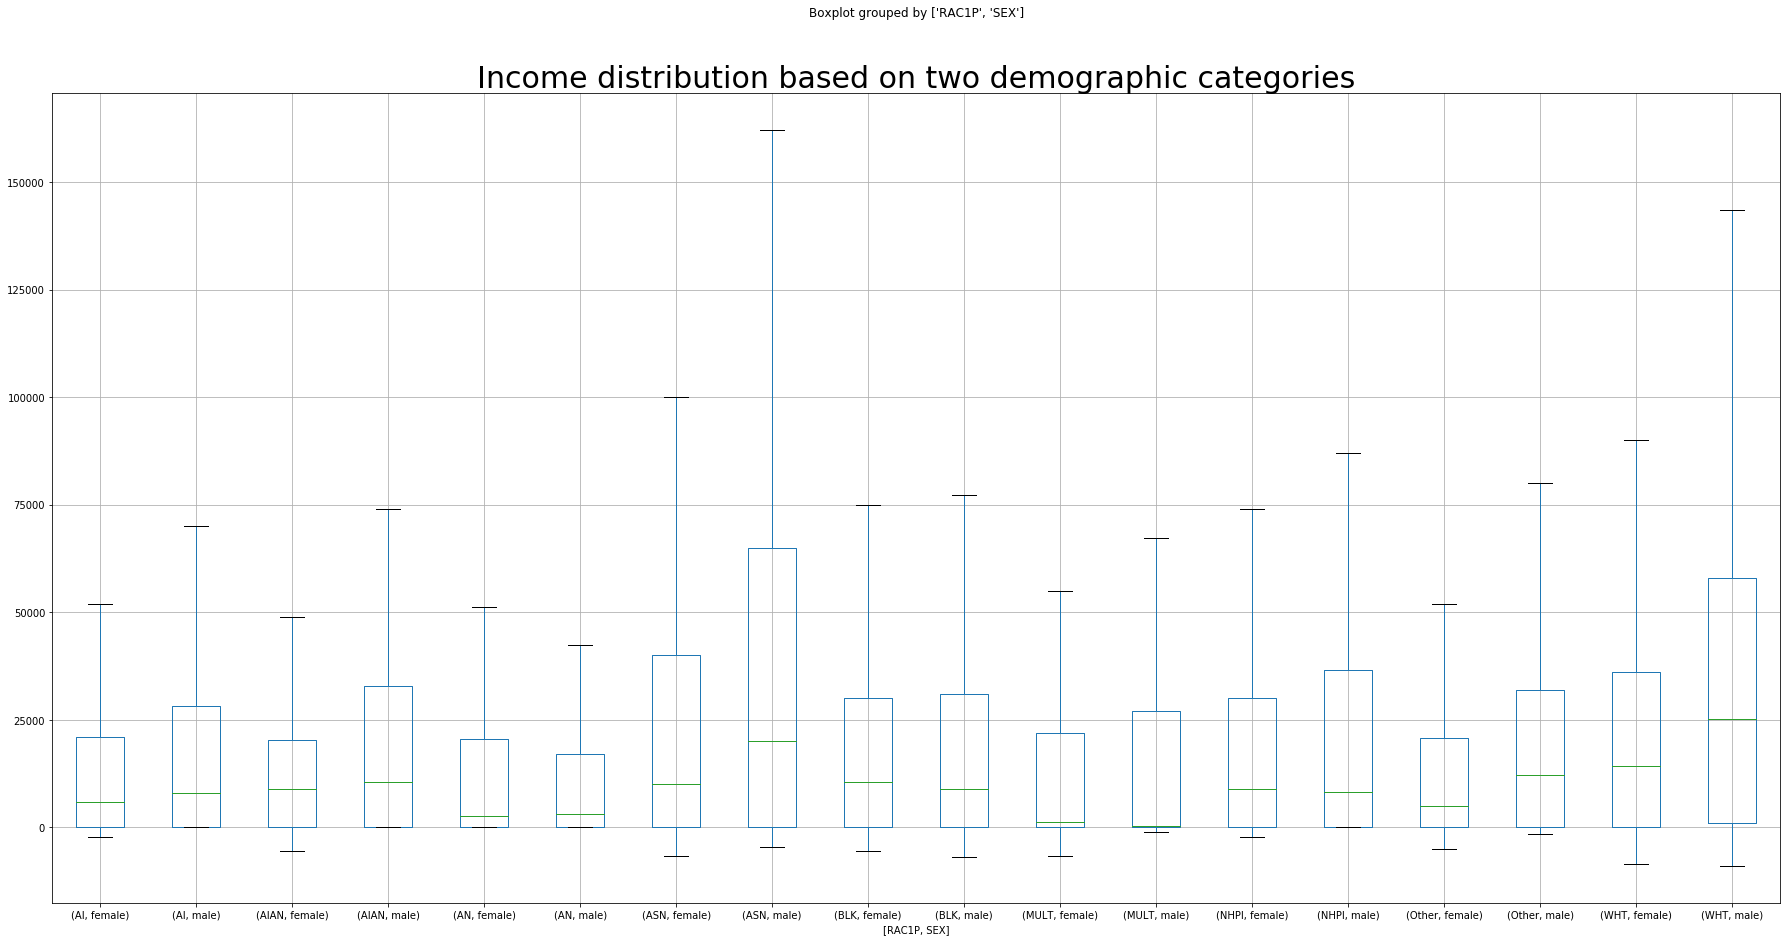

In [94]:
def visualize_descriptives():
    #everytime you use this, change your column and your groupby
    fig, ax = mplt.subplots(figsize=(30,15))
    fs = 30
    correlational_df.boxplot(column=['PINCP'], by=['RAC1P','SEX'],ax=ax,showfliers=False,fontsize=10)
    ax.set_title('Income distribution based on two demographic categories', fontsize=fs)
visualize_descriptives()

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
def oneway_ANOVA(data, IV, DV):
    Al_F = data[data[IV] == "Al Female"][DV]
    Al_M = data[data[IV] == "Al Male"][DV]
    AIAN_F = data[data[IV] == ""][DV]
    Al_M = data[data[IV] == "Al Male"][DV]
    results = stats.f_oneway(auto, dynamic, explicit)
    fstatistic = results[0]
    pvalue = results[1]
    df1 = len(descriptives) - 1
    df2 = (len(auto) - 1) + (len(dynamic) - 1) + (len(explicit) - 1)
    levene_results = stats.levene(auto, dynamic, explicit)
    shapiro_auto = stats.shapiro(auto)
    shapiro_dynamic = stats.shapiro(dynamic)
    shapiro_explicit = stats.shapiro(explicit)
    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()
    return df1,df2,format(pvalue, '.5f'),format(fstatistic,'.2f'),levene_results,shapiro_dynamic,shapiro_explicit,shapiro_auto,print(tukey_result)

In [7]:
oneway_ANOVA(correlational_df, ['RAC1P','SEX'], ['PINCP'])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 915363